# Title: Spam Email Classification

<h1 style="font-family: 'poppins'; font-weight: bold; color: white;">👨‍💻Author: Hasnain Yaqoob</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hasnainyaqub)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hasnainyaqooob)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hasnain-yaqoob-/)  


[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://twitter.com/Hasnain_Yaqoob_)
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hasnainyaqkoob)
[![TikTok](https://img.shields.io/badge/TikTok-Profile-black?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@hasnainyaqub)  

[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/hasnain_yaqub/)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hasnainyaqubakm@gmail.com)

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Load the dataset

In [2]:
df = pd.read_csv('combined_data.csv')
print(df.shape)
df.head()

(83448, 2)


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


# 2. EDA

In [3]:
# Data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
# lets check for duplicates
df.duplicated().sum()

np.int64(0)

- no duplicates, no null values

In [5]:
# lets print shape of dataframe
print(f'{df.shape[0]} rows and {df.shape[1]} columns')

83448 rows and 2 columns


In [6]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [7]:
# lets check that how many of data is spam
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

In [8]:
# Plot pie chart of label distribution
fig = px.pie(df['label'].value_counts().reset_index(name='count').rename(columns={'index': 'label'}),
             values='count', names='label', title='Spam and Ham Data Percentage')
fig.show()

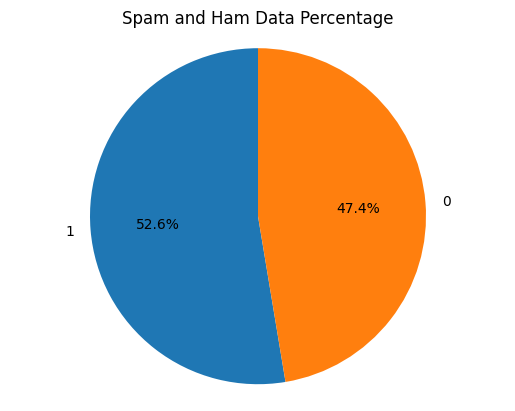

In [9]:
# Plot pie chart of label distribution
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, title='Spam and Ham Data Percentage', ylabel='')
plt.axis('equal')
plt.show()

In [10]:
# !python -m textblob.download_corpora

In [11]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [12]:
df.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#  Data Preprocessing
- lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


- Fix TextBlob	Keep using your existing code	`python -m textblob.download_corpora`

In [13]:
# !pip install swifter
# nltk.download('punkt')
# nltk.download('stopwords')

In [14]:
import nltk
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import swifter

# Make sure resources are downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')

# Initialize once
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Helper: map POS tag to wordnet POS (for better lemmatization)
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    return " ".join(tokens)


/home/dark/miniconda3/envs/dl_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [15]:
# import nltk
# import string
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import swifter

# # Load once
# ps = PorterStemmer()
# stop_words = set(stopwords.words('english'))

# def transform_text(text):
#     text = text.lower()
#     tokens = nltk.word_tokenize(text)
#     tokens = [word for word in tokens if word.isalnum()]
#     tokens = [word for word in tokens if word not in stop_words]
#     tokens = [ps.stem(word) for word in tokens]
#     return " ".join(tokens)

In [16]:
# transform_text('I loved the youtube lectures on machine learning. How about you?')

In [17]:
# df['transformed_text'] = df['text'].swifter.apply(transform_text)

In [18]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [19]:
# # Save the transformed dataset
# df.to_csv("spam_dataset_transformed.csv", index=False)
# df.to_pickle("spam_dataset_transformed.pkl")


In [20]:
# df1 = pd.read_csv("spam_dataset_transformed.csv")
# df1.head()
df = pd.read_pickle("spam_dataset_transformed.pkl")
df.head()

,label,text,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...


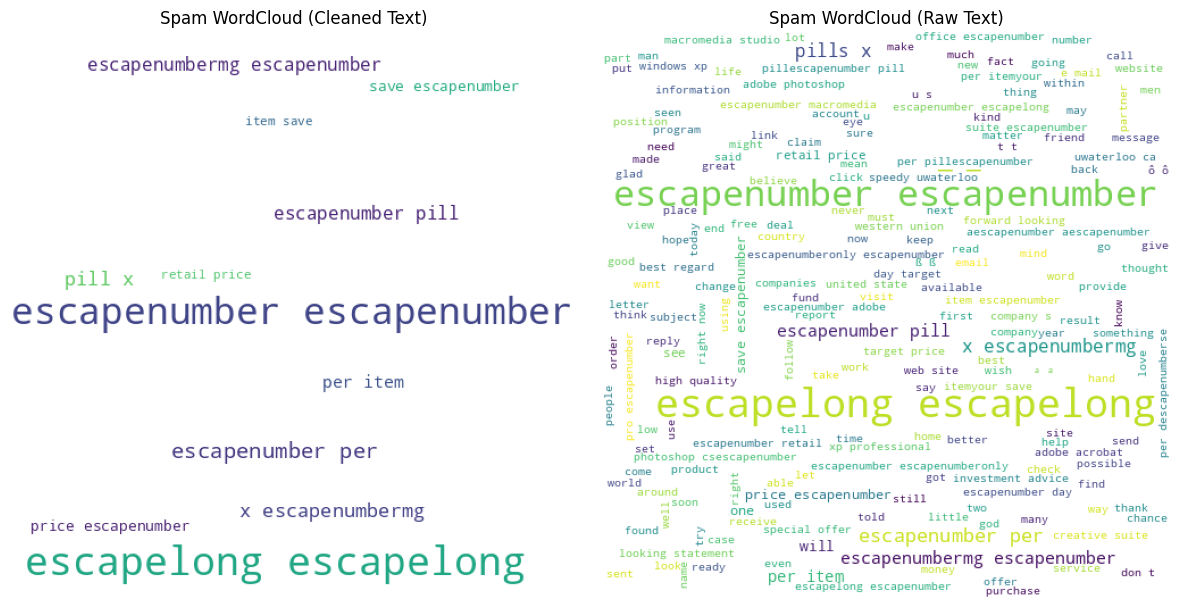

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create both WordClouds
wc_cleaned = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_cleaned.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=' '))

wc_raw = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_raw.generate(df[df['label'] == 1]['text'].str.cat(sep=' '))

# Plot side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_cleaned)
plt.title("Spam WordCloud (Cleaned Text)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_raw)
plt.title("Spam WordCloud (Raw Text)")
plt.axis('off')

plt.tight_layout()
plt.show()


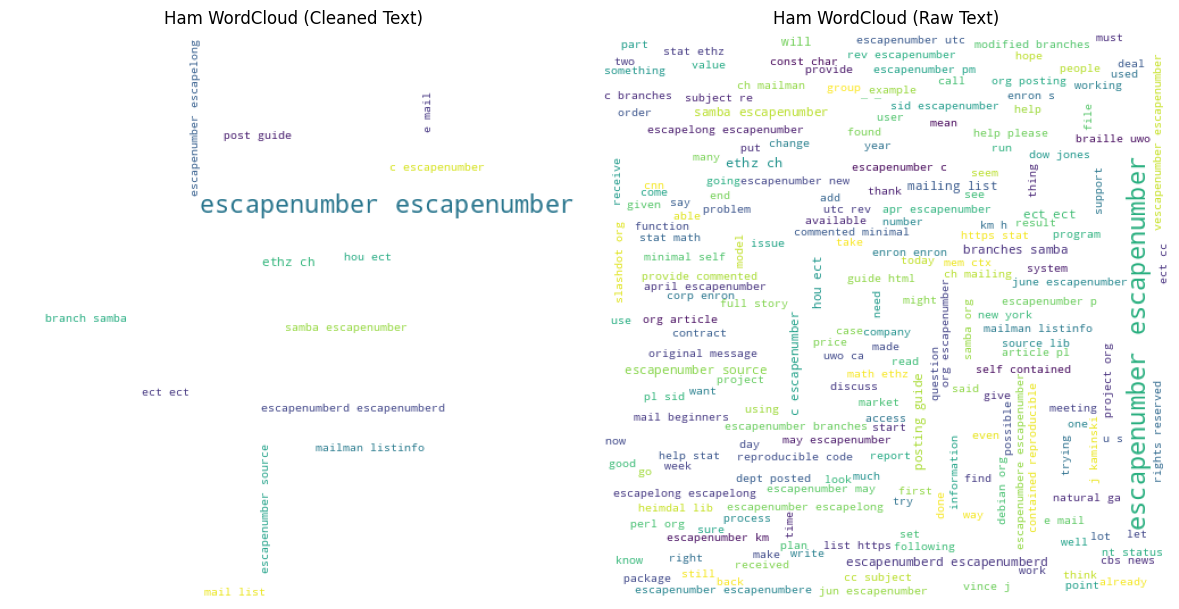

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ham WordCloud from cleaned/stemmed text
wc_cleaned = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_cleaned.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=' '))

# Ham WordCloud from raw/original text
wc_raw = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wc_raw.generate(df[df['label'] == 0]['text'].str.cat(sep=' '))

# Plot side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wc_cleaned)
plt.title("Ham WordCloud (Cleaned Text)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_raw)
plt.title("Ham WordCloud (Raw Text)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(spam_corpus), len(ham_corpus)

(5516343, 9067901)

In [24]:
from collections import Counter
import pandas as pd

# Top 30 words in spam
spam_common = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_common, columns=['Spam_Word', 'Spam_Count'])

# Top 30 words in ham
ham_common = Counter(ham_corpus).most_common(30)
ham_df = pd.DataFrame(ham_common, columns=['Ham_Word', 'Ham_Count'])

# Combine side by side
combined_df = pd.concat([spam_df, ham_df], axis=1)
combined_df


,Spam_Word,Spam_Count,Ham_Word,Ham_Count
0,escapenumber,333253,escapenumber,798890
1,escapelong,188114,http,63544
2,com,29014,r,53957
3,http,27851,enron,52858
4,per,26141,c,45443
5,pill,25473,org,42546
6,price,24199,com,40769
7,x,23838,escapelong,39019
8,escapenumbermg,20541,ect,34745
9,company,19984,list,34673


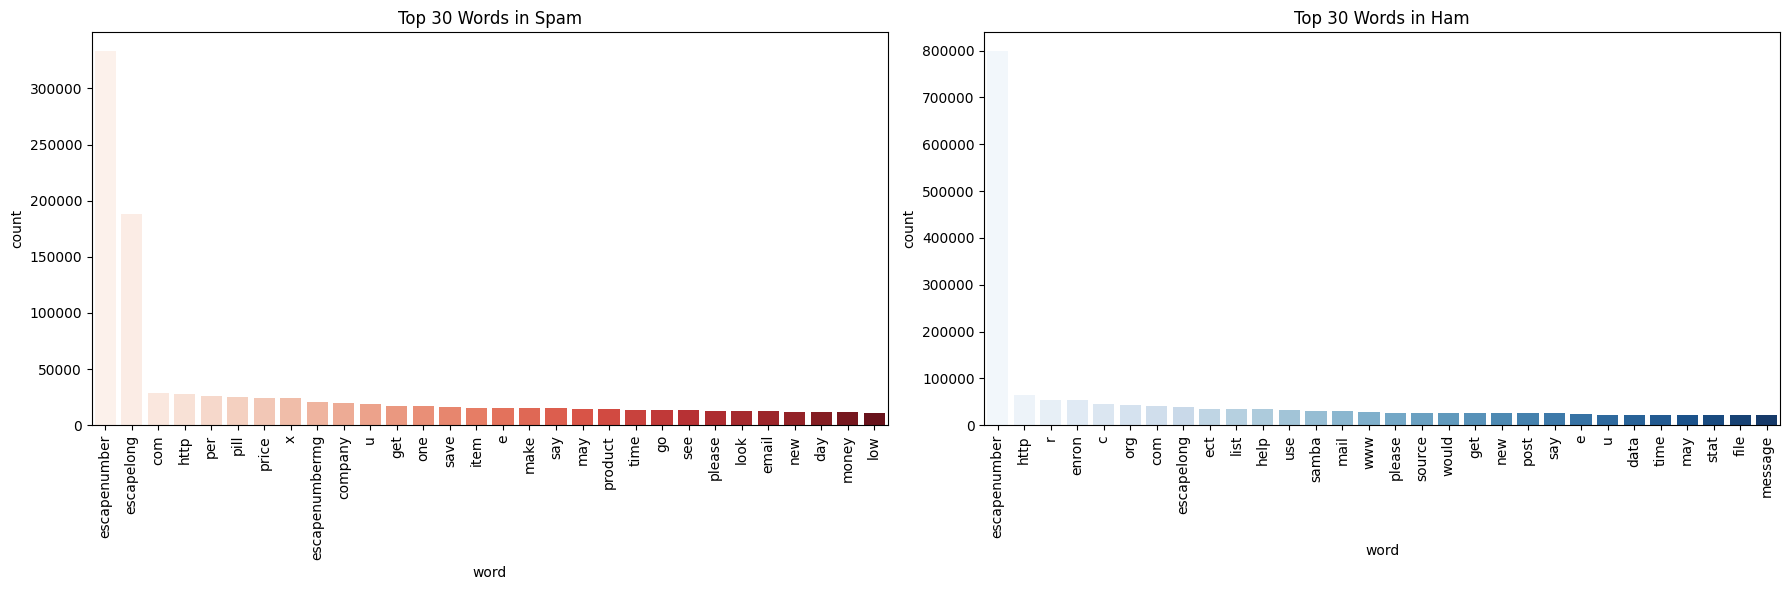

In [25]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Prepare Spam Corpus ----
spam_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# ---- Prepare Ham Corpus ----
ham_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# ---- Plot side-by-side ----
plt.figure(figsize=(18, 6))  # wider figure

# Plot 1: Spam
plt.subplot(1, 2, 1)
sns.barplot(x='word', y='count', data=spam_common_df, palette='Reds')
plt.title("Top 30 Words in Spam")
plt.xticks(rotation='vertical')

# Plot 2: Ham
plt.subplot(1, 2, 2)
sns.barplot(x='word', y='count', data=ham_common_df, palette='Blues')
plt.title("Top 30 Words in Ham")
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()



# Model Building


In [26]:
# Text Vectorization using Bag of words
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [27]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [28]:
X.shape

(83448, 5000)

In [29]:
y = df['label'].values
y

array([1, 1, 0, ..., 1, 0, 1])

In [30]:
# split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(f'Logistic Regression Confusion_matrix {confusion_matrix(y_test, y_pred_lr)}')
print(f'Logistic Regression Precision_score {precision_score(y_test, y_pred_lr)}')

Logistic Regression Accuracy: 0.9829239065308568
Logistic Regression Confusion_matrix [[7714  198]
 [  87 8691]]
Logistic Regression Precision_score 0.9777252784340196


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Optional: suppress warnings from xgboost/lightgbm
import warnings
warnings.filterwarnings("ignore")

# Import XGBoost and LightGBM
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Split your data (X = features, y = labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVC": LinearSVC(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    "LightGBM": LGBMClassifier()
}

# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")

    # GaussianNB only needs dense input if using sparse matrix
    if name == "GaussianNB":
        if hasattr(X_train, "toarray"):
            model.fit(X_train.toarray(), y_train)
            y_pred = model.predict(X_test.toarray())
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# Summary table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nModel Performance Summary:")
print(results_df.to_string(index=False))



Training MultinomialNB...
Accuracy: 0.9672 | Precision: 0.9731 | Recall: 0.9640 | F1-Score: 0.9685

Training BernoulliNB...
Accuracy: 0.9066 | Precision: 0.8849 | Recall: 0.9447 | F1-Score: 0.9138

Training GaussianNB...
Accuracy: 0.9693 | Precision: 0.9697 | Recall: 0.9718 | F1-Score: 0.9707

Training LogisticRegression...
Accuracy: 0.9836 | Precision: 0.9802 | Recall: 0.9888 | F1-Score: 0.9845

Training LinearSVC...
Accuracy: 0.9853 | Precision: 0.9834 | Recall: 0.9887 | F1-Score: 0.9860

Training RandomForest...
Accuracy: 0.9865 | Precision: 0.9852 | Recall: 0.9891 | F1-Score: 0.9872

Training LightGBM...
[LightGBM] [Info] Number of positive: 35158, number of negative: 31600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.089423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 762208
[LightGBM] [Info] Number of data points in the tra

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to dense if needed
if hasattr(X_train, "toarray"):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Initialize ETC
model_final = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Train
model_final.fit(X_train, y_train)

# Predict
y_pred = model_final.predict(X_test)

# Evaluate
print("ExtraTreesClassifier Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))


ExtraTreesClassifier Results:
Accuracy:  0.9861593768723786
Precision: 0.9878621321424482
Recall:    0.985717550274223
F1-Score:  0.9867886760080069


In [34]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to dense if needed
if hasattr(X_train, "toarray"):
    X_train = X_train.toarray()
    X_test = X_test.toarray()

# Initialize ETC
model_rndf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
model_rndf.fit(X_train, y_train)

# Predict
y_pred = model_rndf.predict(X_test)

# Evaluate
print("ExtraTreesClassifier Results:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))


ExtraTreesClassifier Results:
Accuracy:  0.9865188735769922
Precision: 0.9852054170934335
Recall:    0.9891453382084096
F1-Score:  0.9871714464906779


In [35]:
import pickle

# Vectorizer save karte waqt file ko 'wb' mode mein open karein (write binary)
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Model bhi isi tarah save karen
pickle.dump(model_rndf, open('model.pkl', 'wb'))